In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sstats

## Task 1)

We have a conditional distribution $P(X_{n+1} = j|X_n = i} = P_{i,j}$ which is the i'th row and j'th column of the Markov chain's probability matrix.

We simply use this to sample from as a multinomial distribution at each stage, which n = 1.

If $P(X_{n+1} = 4|X_n = i}$ we terminate and start over, until we have run 1000 simulations.

In [3]:
def samplesDiscMarkovMatrix(P,n,x_death = 4):
    samples = []
    for i in range(n):
        x = 0
        sample = []
        while(x != x_death):
            P_n = P[x]
            x = np.random.choice([i for i in range(len(P_n))],p=P_n)
            sample += [x]

        samples += [sample]

    return samples

P_disc = np.array([[0.9915,0.005,0.0025,0,0.001],[0,0.986,0.005,0.004,0.005],[0,0,0.992,0.003,0.005],[0,0,0,0.991,0.009],[0,0,0,0,1]])

#Get 1000 women's lifetimes
women_1000 = samplesDiscMarkovMatrix(P_disc,1000)

(array([19., 19., 15., 21., 23., 20., 28., 27., 31., 29., 27., 10., 28.,
        31., 28., 24., 35., 19., 26., 30., 25., 24., 33., 19., 21., 17.,
        10., 15., 22.,  8., 20., 18., 17., 14., 20., 19., 10., 14., 13.,
        17., 11.,  5., 11.,  7.,  5.,  9., 10., 10.,  7.,  8.,  5.,  3.,
         2.,  5.,  4.,  6.,  8.,  2.,  1.,  2.,  3.,  1.,  2.,  1.,  3.,
         3.,  1.,  0.,  1.,  1.,  3.,  1.,  2.,  2.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   4.  ,   15.06,   26.12,   37.18,   48.24,   59.3 ,   70.36,
          81.42,   92.48,  103.54,  114.6 ,  125.66,  136.72,  147.78,
         158.84,  169.9 ,  180.96,  192.02,  203.08,  214.14,  225.2 ,
         236.26,  247.32,  258.38,  269.44,  280.5 ,  291.56,  302.62,
         313.68,  324.74,  335.8 ,  346.86,  357.92,  368.98,  380.04,
         391.1 ,  402.16,  413.22,  424.28,  435.34,  446.4 ,  457.46,
        

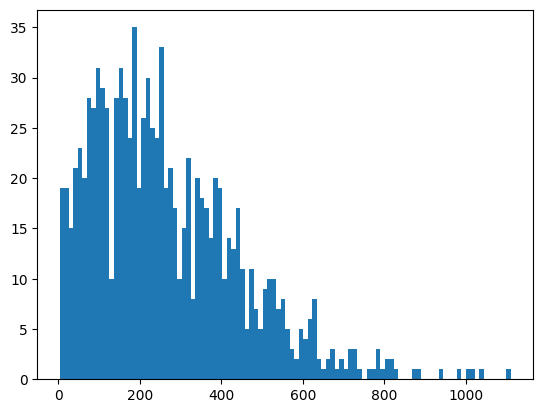

In [4]:
T_count_e = [len(lifetime) for lifetime in women_1000]
plt.hist(T_count_e,bins=100)

In [5]:
proportion_reappear = [1 in lifetime for lifetime in women_1000].count(True)/len(women_1000)
print(f"Approximately {proportion_reappear*100}% of the women reach stage 2, that is, have cancer again locally")

Approximately 58.199999999999996% of the women reach stage 2, that is, have cancer again locally


In [6]:

def getPt(P,t):
    P_n = P
    for x in range(t):
     P_n = P_n@P
    return P_n

# Task 2

We first find the emprical distribution at t = 120.

In [7]:
t = 120
t_count = [lifetime[120] for lifetime in women_1000 if len(lifetime)>=(t+1) and lifetime[120] != 4]

#We add those that died - R.I.P Pour one out
t_count += [4 for x in range(len(women_1000) - len(t_count))]
t_dist = np.unique(t_count,return_counts=True)[1]/len(t_count)

#Get the P_t
P_t = getPt(P_disc,t)

In [8]:
sstats.chisquare(np.unique(t_count,return_counts=True)[1],P_t[0]*len(t_count))

Power_divergenceResult(statistic=0.5786094818274181, pvalue=0.965410742444172)

[0.35597454 0.15852579 0.16645055 0.06826591 0.25078322]
[0.361 0.162 0.165 0.063 0.249]


(array([361.,   0., 162.,   0.,   0., 165.,   0.,  63.,   0., 249.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

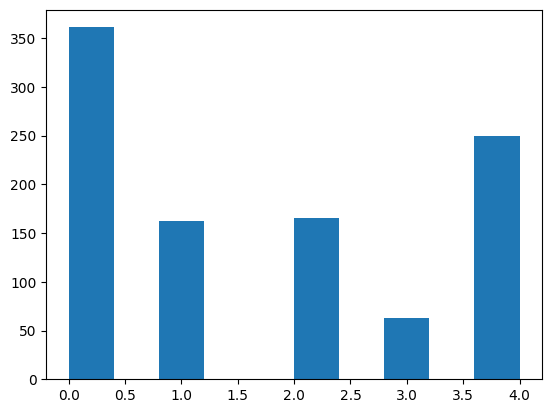

In [9]:
print(P_t[0])
print(t_dist)
plt.hist(t_count)


In [10]:
pi = P_disc[0,:4]
Ps = P_disc[:4,:4]
ps = P_disc[:4,4]

T = lambda t: pi@np.linalg.matrix_power(Ps,t)@ps
E_T = np.sum(pi@np.linalg.inv((np.identity(4)-Ps)))

We do a Kolmogorov-Smirnov test to see, if the two distributions are the same.

Furthermore, we compare our analytical mean with the bootstrapped estimate of our sampled distribution's mean. We also print the MSE of our mean estimate. However, the mean doesn't tell us anything without the KS test, as we can have the same mean but completely different distributions.

In [11]:
def bootStrap(data_vector):
    U_disc = np.random.randint(0,len(data_vector),len(data_vector))
    return [data_vector[u] for u in U_disc]

n = len(T_count_e)
X_i = T_count_e
X_bar = []
MSE_sample = []

for r in range(1000):
    X_sample = bootStrap(X_i)
    X_bar += [np.mean(X_sample)]
    MSE_sample += [np.sum((np.array(X_sample) - np.mean(X_sample))**2)/n**2]


mu = np.mean(X_bar)
print(f"This is the expectation of the MSE of our expectation estimates: {np.mean(MSE_sample)} "
      f"and this is the mean of our mean estimates: {mu}.\n"
      f"Finally, this is the absolute difference between our estimated mean and the analytical, divided by the MSE: {np.abs(mu-E_T)/np.mean(MSE_sample)}")


This is the expectation of the MSE of our expectation estimates: 33.774704724492 and this is the mean of our mean estimates: 266.125734.
Finally, this is the absolute difference between our estimated mean and the analytical, divided by the MSE: 0.14075974093592877


# Task 4

Computers are super fast, it would take longer to make a method that specifically ensures we only get those that survive 12 months but also get cancer.

Instead, we just sample a very high number and take the first 1000 of those, that fulfill the criteria.

In [12]:
#women_100000 = samplesDiscMarkovMatrix(P_disc,100000)

#First those, that died within the first 12 months
women_12 = [woman for woman in women_100000 if len(woman)>11 and (1 in woman[:12] or 2 in woman[:12] or 3 in woman[:12])]

T_count_e12  = [len(lifetime) for lifetime in women_12]
print(f"The estimated expected lifetime: {np.mean(T_count_e12)}")

NameError: name 'women_100000' is not defined

# Task 5


In [13]:
task5_prop_samples = []

for _ in range(100):
    T_sample = [len(lifetime) for lifetime in samplesDiscMarkovMatrix(P_disc,200) if len(lifetime)<=350]
    task5_prop_samples += [len(T_sample)/200]

print(f"Mean expected fraction of womean who die within the first 350 months: {np.mean(task5_prop_samples)} \t - based off of crude MC estimation for 200 samples")

Mean expected fraction of womean who die within the first 350 months: 0.7392500000000001 	 - based off of crude MC estimation for 200 samples


Let the parameter we wish to estimate be $E[D]$ where

E[D] = $ \frac{1}{200} \sum_{i=1}^{200} D_i$, where $D_i$ are the fraction of women who die within the first 350 months for the i'th run of the simulation.
And E[D] then is the expected number of women who die within the first 350 months.

If we choose our control variate to be $\bar{T}$ then $\mu_{\bar{T}} = E[\bar{T}] = E[T]$.

We can then construct our new estimator for our parameter $E[Z] \approx E[D]$, where
$Z = D + c*(\bar{T} - E[T])$, where c is:

$c = \frac{-1*Cov(D,\bar{T})}{Var[\bar{T}]}$

We will not try to estimate the covariance analytically, instead we will just do it empirically.

In [20]:
Zs = []
Ds = []
T_bars = []

for _ in range(100):
    lifetimes = [len(lifetime) for lifetime in samplesDiscMarkovMatrix(P_disc,200)]
    Ds += [len([lifetime for lifetime in lifetimes if lifetime<=350])/200]
    T_bars += [np.mean(lifetimes)]

#Calculate c
c = -1*np.cov(Ds,T_bars)[1,0]/np.var(T_bars)

Z = np.array(Ds) + c*(np.array(T_bars) - E_T)
print(f"Using our control variate resulted in a factor of {np.var(task5_prop_samples)/np.var(Z)} estimated reduction of variance. "
      f"With an estimated mortality rate before the 350th month after surgery of {np.mean(Z)}")

Using our control variate resulted in a factor of 3.3428536580329298 estimated reduction of variance.With an estimated mortality before the 350th month after surgery of 0.7405093824686361
